## QuantAQ Data
Data are available via an API, but only for members of the QuantAQ organization maintaining each group of sensors.

For those who are members of a QuantAQ organizatio, the code below walks through the basics of accessing data via the API. For everyone else please skip ahead to the Exploratory Data Analysis Code Block to continue the analysis.


## How to Access QuantAQ data with python through an API

The first step is to sign up for a free QuantAQ account: https://app.quant-aq.com/auth/sign-up

<img src="./images/QuantAQ-SignUp.png" alt="QuantAQ Signup" width="400"/>

The next step is to obtain an API Key:

From the API Documentation

Obtaining an API key
Authentication is handled using HTTP Basic Auth which consists of sending an API key that is unique to your account with each request. This key should be kept secret and not shared with anyone. This API key is tied to your user account and will only allow you to take actions within your assigned scope of permissions.

You can generate an API key for your account by visiting the Developer section within the QuantAQ Cloud and clicking Generate New Key in the upper right-hand corner of your screen. It is recommended that you set this key as an environment variable on your computer with the name QUANTAQ_APIKEY.

To include your API key in your request, add an HTTP Authorization header, consisting of a usernameand password. When using httpie, you can use the -aflag to indicate authorization. The API key serves as the username and the password should be left blank.

<img src="./images/QuantAQ-Key.png" alt="QuantAQ API-Key" width="800"/>

Next, please install the python package available for working with the API which is fully described here: https://github.com/quant-aq/py-quantaq.git

In [7]:
try:
    import quantaq
    print("quantaq is already installed")
except ImportError:
    !pip install git+https://github.com/quant-aq/py-quantaq.git

quantaq is already installed


Now we are ready to interact with the API. We will start by setting up the API client. This will require you to input the API Key that was created in the previous step.

In [8]:
# import the library
import quantaq
import os, getpass
# Set the API key as an environment variable within the notebook session
os.environ['QUANTAQ_APIKEY'] = getpass.getpass("Enter your API key: ")
# Initialize the QuantAQ client
client = quantaq.QuantAQAPIClient(api_key=os.environ['QUANTAQ_APIKEY'])

In order to verify that things are working as expected, first explore some metadata about the client created in the previous step.

In [9]:
# verify account information
whoami = client.whoami()
print (whoami)
# You can retrieve a list of all the organizations visible to you:
organizations = client.organizations.list()
print (organizations)
# You can retrieve a list of all the devices visible to you:
devices = client.devices.list()
print (devices)

{'confirmed': True, 'email': 'topstschool@ciesin.columbia.edu', 'first_name': 'TOPS', 'id': 2704, 'is_administrator': False, 'last_name': 'SCHOOL', 'last_seen': '2025-02-28T18:17:47.085848', 'member_since': '2025-01-31T14:38:35.980542', 'role': 1, 'username': 'topstschool'}
[{'created_on': '2023-10-18T20:43:11.197345+00:00', 'description': 'South Bronx Unite brings together neighborhood residents, community organizations, academic institutions, and allies to improve and protect the social, environmental, and economic future of Mott Haven and Port Morris.', 'devices': ['MOD-PM-01151', 'MOD-PM-01465', 'MOD-PM-01315', 'MOD-PM-01463', 'MOD-PM-01156', 'MOD-PM-01331', 'MOD-PM-01324', 'MOD-PM-01467', 'MOD-PM-01146', 'MOD-00479', 'MOD-00480', 'MOD-00697', 'MOD-PM-01150', 'MOD-PM-01159', 'MOD-PM-01161', 'MOD-PM-01145', 'MOD-00478', 'MOD-PM-01144', 'MOD-00693', 'MOD-PM-01317', 'MOD-PM-01322', 'MOD-PM-01332', 'MOD-PM-01158', 'MOD-PM-01162', 'MOD-PM-01149', 'MOD-00481', 'MOD-PM-01334', 'MOD-PM-011

Ok, it looks like we have access. In the example above we have partnered with a community organization in the South Bronx of New York City called South Bronx Unite. More on that later, but assuming you do have access to an organization, here are some examples of how you might want to interact with the API.

From the list of devices above we are able to grab the device Serial Numbers (sn). The sn will be used in order to query the devices.

First lets look at the most recent data from a single device; sn='MOD-00480'

In [10]:
# You can limit the return to just the most recent data points from a single device:
recent = client.data.list(sn='MOD-00480', sort="timestamp,asc", limit=10)
for r in recent:
    print(r)

{'co': None, 'geo': {'lat': 40.806, 'lon': -73.93}, 'met': {'rh': 90.0, 'temp': 6.1, 'wd': 0.0, 'ws': None, 'ws_scalar': 0.0}, 'model': {'gas': {'co': None, 'no': None, 'no2': None, 'o3': None}, 'pm': {'pm1': 11669, 'pm10': 11671, 'pm25': 11670}}, 'no': None, 'no2': None, 'o3': None, 'pm1': 4.18, 'pm10': 167.16, 'pm25': 6.95, 'raw_data_id': 83357948, 'rh': 90.0, 'sn': 'MOD-00480', 'temp': 6.1, 'timestamp': '2000-01-01T00:01:01', 'timestamp_local': '1999-12-31T19:01:01', 'url': 'https://api.quant-aq.com/v1/devices/MOD-00480/data/83357866'}
{'co': None, 'geo': {'lat': None, 'lon': None}, 'met': {'rh': 39.2, 'temp': 25.9, 'wd': 0.0, 'ws': None, 'ws_scalar': 0.0}, 'model': {'gas': {'co': None, 'no': None, 'no2': None, 'o3': None}, 'pm': {'pm1': 11669, 'pm10': 11671, 'pm25': 11670}}, 'no': None, 'no2': None, 'o3': None, 'pm1': 2.12, 'pm10': 4.33, 'pm25': 2.46, 'raw_data_id': 62314430, 'rh': 39.2, 'sn': 'MOD-00480', 'temp': 25.9, 'timestamp': '2023-09-15T16:45:28', 'timestamp_local': '2023-0

Alternatively, we could select a data range and query all of the devices over that range. 

Since this will result in a lot of data returned, we will utilize the python pandas library in order to manage it.

In [ ]:
# import libraries
import pandas as pd
from quantaq.utils import to_dataframe
df = []
# To get a list of all devices:
devices = client.devices.list()
for device in devices:
    serialNumber = device['sn']
    # For each device, query the API for data from November 7th to November 10th, 2024
    for each in pd.date_range(start='2024-11-07', end='2024-11-10'):
        df.append(
            to_dataframe(client.data.bydate(sn=serialNumber, date=str(each.date())))
        )
df = pd.concat(df)
# Drop some fields that are not useful for this analysis
fields_to_drop = ['met.rh', 'met.temp', 'met.wd', 'met.ws', 
                  'met.ws_scalar', 'model.gas.co', 'model.gas.no', 
                  'model.gas.no2', 'model.gas.o3', 'model.pm.pm1', 
                  'model.pm.pm10', 'model.pm.pm25', 'met.wd','met.ws','met.ws_scalar']
df = df.drop(columns=fields_to_drop, errors='ignore')
# save the output file to a csv
df.to_csv('./data/quant_aq_data_11-07-24_11-10-24.csv', index=False)

C:\Users\kyttm\AppData\Local\Temp\ipykernel_26468\42203297.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df)


The routine above has resulted in a csv file of data in the South Bronx, New York City from November 7th through November 10th, 2024. 

This corresponds to the highly publicized week when several wildfires broke out in areas surrounding New York City, and smoke rolled in, turning the skyline orange.

<img src="./images/PIP_Fire_NYT.jpg" alt="PIP Wildfire" width="1000"/>

Source: https://www.palisadesparks.org/wildfires

# To continue with the lesson, if you do not have access to a QuantAQ Organization, you can use the following code to load the data from the CSV file

In [7]:
try: 
    import pandas as pd
    print("pandas is already installed")
except:
    import pandas as pd

# read the csv file
# load the data into a pandas dataframe for further analysis
df = pd.read_csv('./data/quant_aq_data_11-07-24_11-10-24.csv')
# view the data set level metadata
df.info()
# display the first 5 rows of the data
df.head()

pandas is already installed
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232518 entries, 0 to 232517
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   pm1              227145 non-null  float64
 1   pm10             227145 non-null  float64
 2   pm25             227145 non-null  float64
 3   raw_data_id      232518 non-null  int64  
 4   sn               232518 non-null  object 
 5   timestamp        232518 non-null  object 
 6   timestamp_local  232518 non-null  object 
 7   url              232518 non-null  object 
 8   geo.lat          172388 non-null  float64
 9   geo.lon          172388 non-null  float64
 10  co               77094 non-null   float64
 11  no               77094 non-null   float64
 12  no2              77094 non-null   float64
 13  o3               77094 non-null   float64
 14  rh               82747 non-null   float64
 15  temp             82747 non-null   float64
 16  wd        

pm1    pm10   pm25  raw_data_id            sn            timestamp  \
0  4.005  15.117  4.451    654166620  MOD-PM-01144  2024-11-07 23:59:53   
1  4.768  15.282  5.310    654166619  MOD-PM-01144  2024-11-07 23:58:53   
2  5.074  11.462  5.477    654166618  MOD-PM-01144  2024-11-07 23:57:53   
3  3.953   8.095  4.380    654164444  MOD-PM-01144  2024-11-07 23:56:53   
4  3.689   7.826  4.100    654164441  MOD-PM-01144  2024-11-07 23:55:53   

       timestamp_local                                                url  \
0  2024-11-07 18:59:53  https://api.quant-aq.com/v1/devices/MOD-PM-011...   
1  2024-11-07 18:58:53  https://api.quant-aq.com/v1/devices/MOD-PM-011...   
2  2024-11-07 18:57:53  https://api.quant-aq.com/v1/devices/MOD-PM-011...   
3  2024-11-07 18:56:53  https://api.quant-aq.com/v1/devices/MOD-PM-011...   
4  2024-11-07 18:55:53  https://api.quant-aq.com/v1/devices/MOD-PM-011...   

   geo.lat  geo.lon  co  no  no2  o3  rh  temp  wd  ws  ws_scalar  
0   40.813   -73.93 NaN NaN  NaN NaN NaN   NaN NaN NaN        NaN  
1   40.813   -73.93 NaN NaN  NaN NaN NaN   NaN NaN NaN        NaN  
2   40.813   -73.93 NaN NaN  NaN NaN NaN   NaN NaN NaN        NaN  
3   40.813   -73.93 NaN NaN  NaN NaN NaN   NaN NaN NaN        NaN  
4   40.813   -73.93 NaN NaN  NaN NaN NaN   NaN NaN NaN        NaN

This provides us with a nice peek at the data, but in order to evaluate it statistically we may want to include additional Exploratory Data Analysis.

We will proceed through a number of checks. For now we will retain all of the variables relevant to Air Quality.

First lets evaluate the data quality.

### Data Quality Check
- Remove rows that are missing latitude and longitude 
- Identify missing values per column.
- Check duplicate entries.
- Verify data types.

matplotlib is already installed
The DF contains this many rows: 232518
Remaining rows after removing missing geolocation data: 172388
Data Quality Check:
                 Missing Values  Missing Percentage Data Type
pm1                        5355            3.106365   float64
pm10                       5355            3.106365   float64
pm25                       5355            3.106365   float64
raw_data_id                   0            0.000000     int64
sn                            0            0.000000    object
timestamp                     0            0.000000    object
timestamp_local               0            0.000000    object
url                           0            0.000000    object
geo.lat                       0            0.000000   float64
geo.lon                       0            0.000000   float64
co                       132085           76.620762   float64
no                       132085           76.620762   float64
no2                      132085         

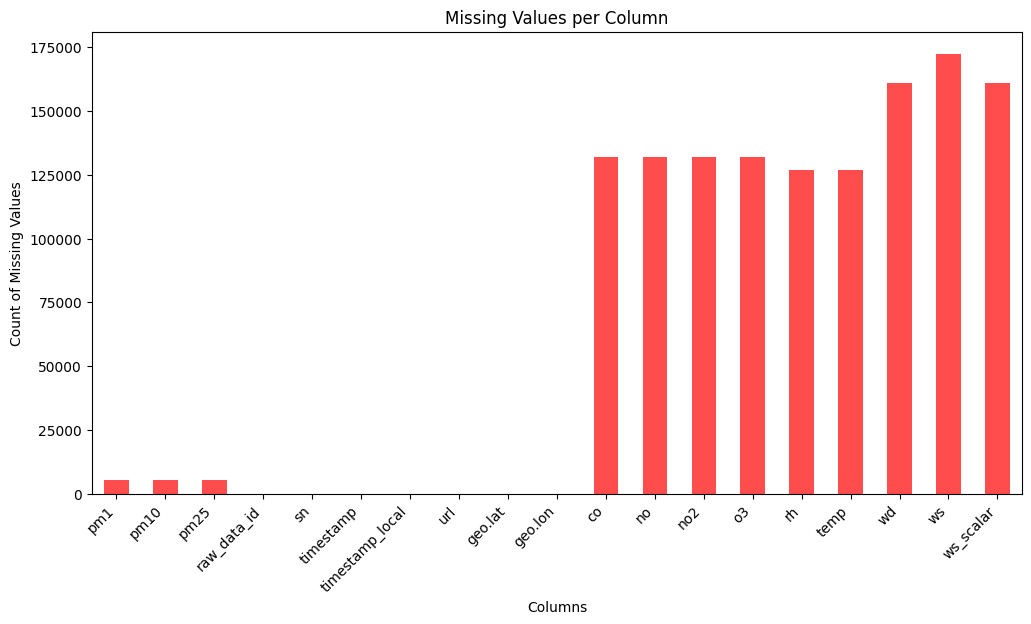

In [8]:
try:
    import matplotlib.pyplot as plt
    print("matplotlib is already installed")
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt

# 1. Data Quality Check

# Identify and remove rows where geo.lat or geo.lon is missing
print(f"The DF contains this many rows: {len(df)}")
df = df.dropna(subset=['geo.lat', 'geo.lon'])
# Verify the changes
print(f"Remaining rows after removing missing geolocation data: {len(df)}")

# Count missing values per column
missing_values = df.isnull().sum()

# Identify duplicate rows
duplicate_count = df.duplicated().sum()

# Data types of each column
data_types = df.dtypes

# Create a summary DataFrame for data quality check
data_quality_check = pd.DataFrame({
    "Missing Values": missing_values,
    "Missing Percentage": (missing_values / len(df)) * 100,
    "Data Type": data_types
})

# Print results
print("Data Quality Check:")
print(data_quality_check)
print("\nDuplicate Rows:", duplicate_count)

# Plot missing values as a bar chart
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar', color='red', alpha=0.7)
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45, ha='right')
plt.show()


The results show that the dataset we created has a lot of missing information in the following areas:

- **Gas Concentrations:** Over 65% missing
- **Wind Speed (ws):** Completely missing
- **Wind Direction (wd):** Completely missing
- **Wind Speed Scalar (ws_scalar):** Completely missing

Despite these gaps, the dataset has no duplicate rows, which suggests that the data we do have is accurate.

We expected to have less information on gas concentrations since our device list showed that only a subset of the sensors were collecting those data. 

For the purposes of comparing our results with those produced from the PurpleAir sensors we will first focus on PM2.5

### Summary Statistics
- Compute basic statistics (mean, median, min, max, standard deviation).
- Identify any outliers using boxplots.

Summary Statistics:
                 pm1           pm10           pm25   raw_data_id  \
count  167033.000000  167033.000000  167033.000000  1.723880e+05   
mean       11.635380      22.071720      12.294709  5.479067e+08   
std        23.845613      33.225903      24.312725  1.781362e+08   
min         0.000000       0.075000       0.075000  2.495542e+08   
25%         3.222000       6.836000       3.586000  2.524486e+08   
50%         4.982000      12.531000       5.436000  6.543589e+08   
75%         7.601000      23.260000       8.451000  6.552154e+08   
max       246.460000    2831.815000     247.935000  6.560555e+08   

             geo.lat        geo.lon            co            no           no2  \
count  172388.000000  172388.000000  40303.000000  40303.000000  40303.000000   
mean       40.814713     -73.914115    676.084801      2.877318     26.460638   
std         0.028996       0.026225    220.003790      7.420708      8.779168   
min        40.686000     -74.024000    239.

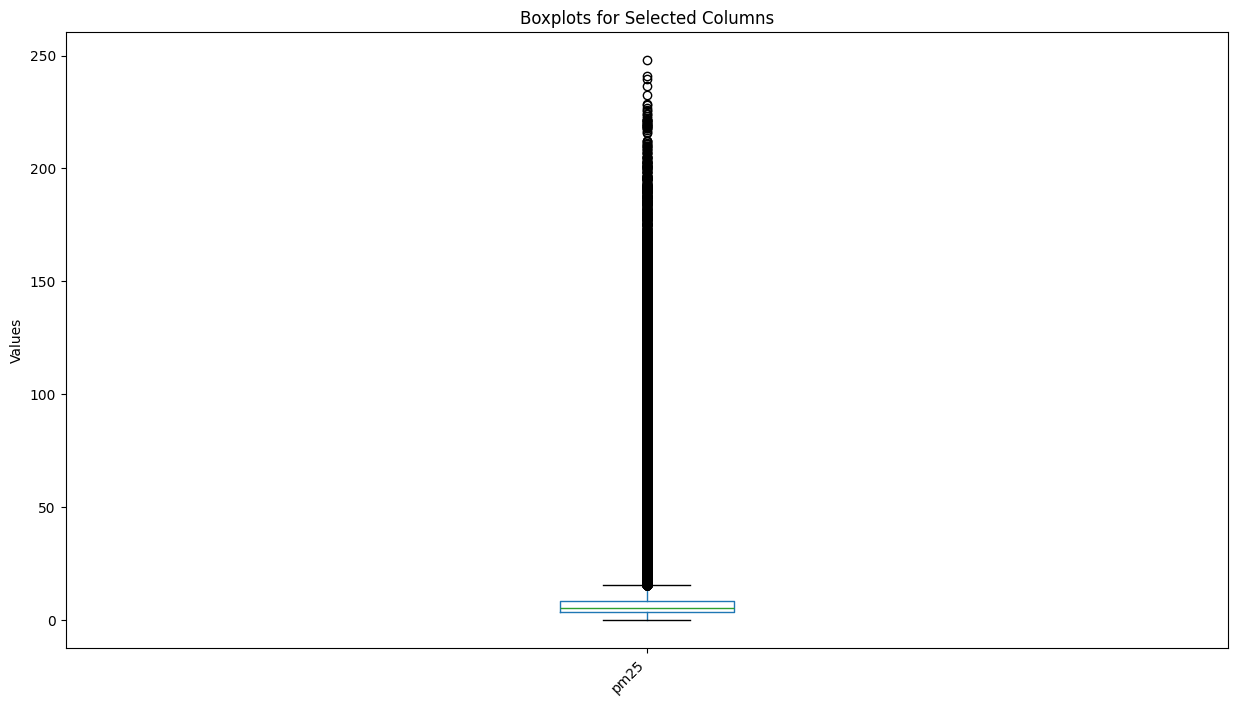

In [9]:
# Compute summary statistics
summary_stats = df.describe()

# Count the number of unique sensors contributing to the data
sensor_counts = df.groupby('sn').size().count()

# Print summary statistics
print("Summary Statistics:")
print(summary_stats)

# Print the number of sensors contributing to the data
print(f"\nNumber of sensors contributing to the data: {sensor_counts}")

# Define columns for which to create boxplots
columns_to_plot = ['pm25']

# Create boxplots for the selected columns
plt.figure(figsize=(15, 8))
df[columns_to_plot].boxplot()
plt.title("Boxplots for Selected Columns")
plt.ylabel("Values")
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()


The summary statistics reveal key insights into the dataset:

- **Particulate Matter (PM2.5):**
  - Exhibit significant variability in their concentrations.
  - The maximum values are substantially higher than the mean, indicating the presence of pollution spikes or outliers.
  - This suggests the need for further investigation into these extreme values.

- **Outliers and Missing Data:**
  - Extreme values stand out and warrant closer examination.

#### Conclusion
- These patterns provide a foundation for further exploratory data analysis, focusing on time series trends and identifying potential pollution events or anomalies.

### Time Series Analysis
- Ensure timestamps are in datetime format (to allow proper time-based analysis).
- Resample data to hourly and 10 minute averages (to observe trends at different time scales).
- Plot time series graphs of PM25.

C:\Users\kyttm\AppData\Local\Temp\ipykernel_42596\1225667386.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_avg_by_sensor = df.groupby('sn')['pm25'].resample('H').mean()


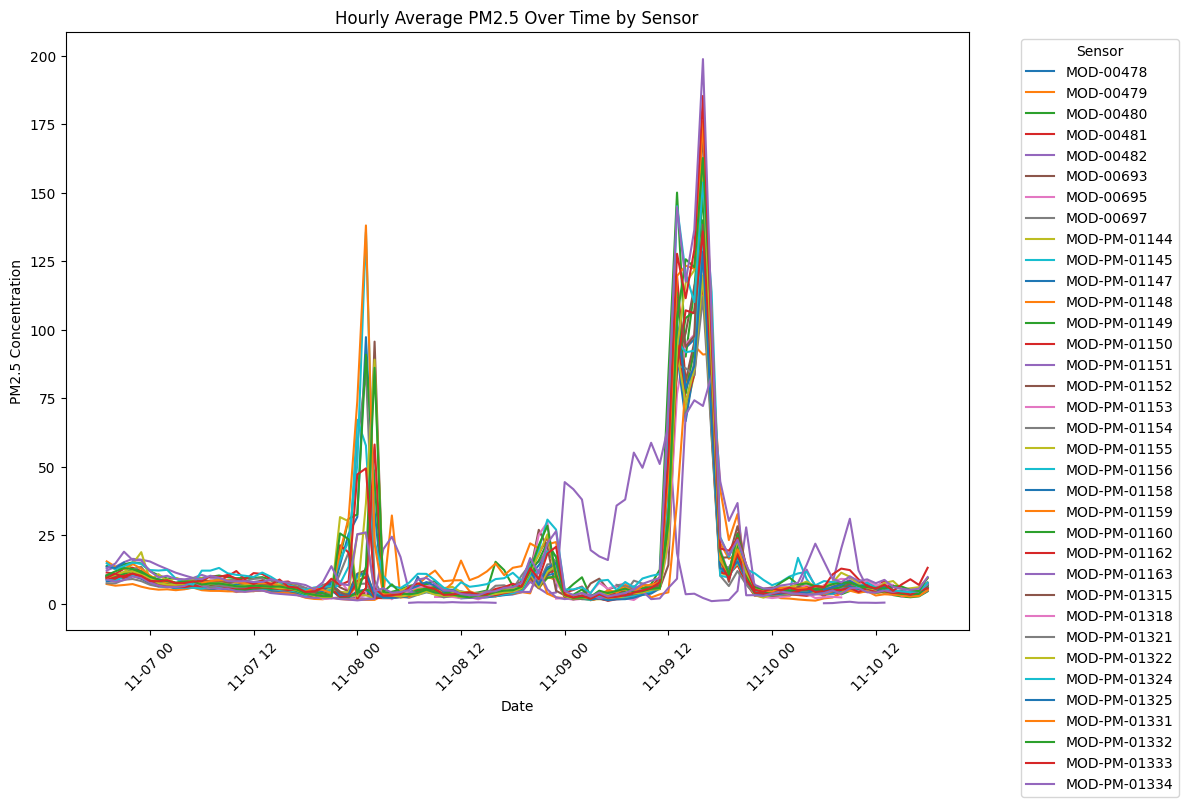

In [10]:
# Ensure timestamp_local is in datetime format and set it as the index
df['timestamp_local'] = pd.to_datetime(df['timestamp_local'], errors='coerce')
df.set_index('timestamp_local', inplace=True)

# Resample data to hourly averages for PM2.5 grouped by sensor
hourly_avg_by_sensor = df.groupby('sn')['pm25'].resample('H').mean()

# Plot time series for PM2.5 hourly averages for each sensor
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each sensor's data
for sensor, data in hourly_avg_by_sensor.groupby(level=0):
    ax.plot(data.index.get_level_values(1), data.values, label=sensor)

ax.set_ylabel('PM2.5 Concentration')
ax.set_title('Hourly Average PM2.5 Over Time by Sensor')
ax.legend(title='Sensor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\kyttm\AppData\Local\Temp\ipykernel_42596\2578918396.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_avg_by_sensor = df.groupby('sn')['no'].resample('H').mean()


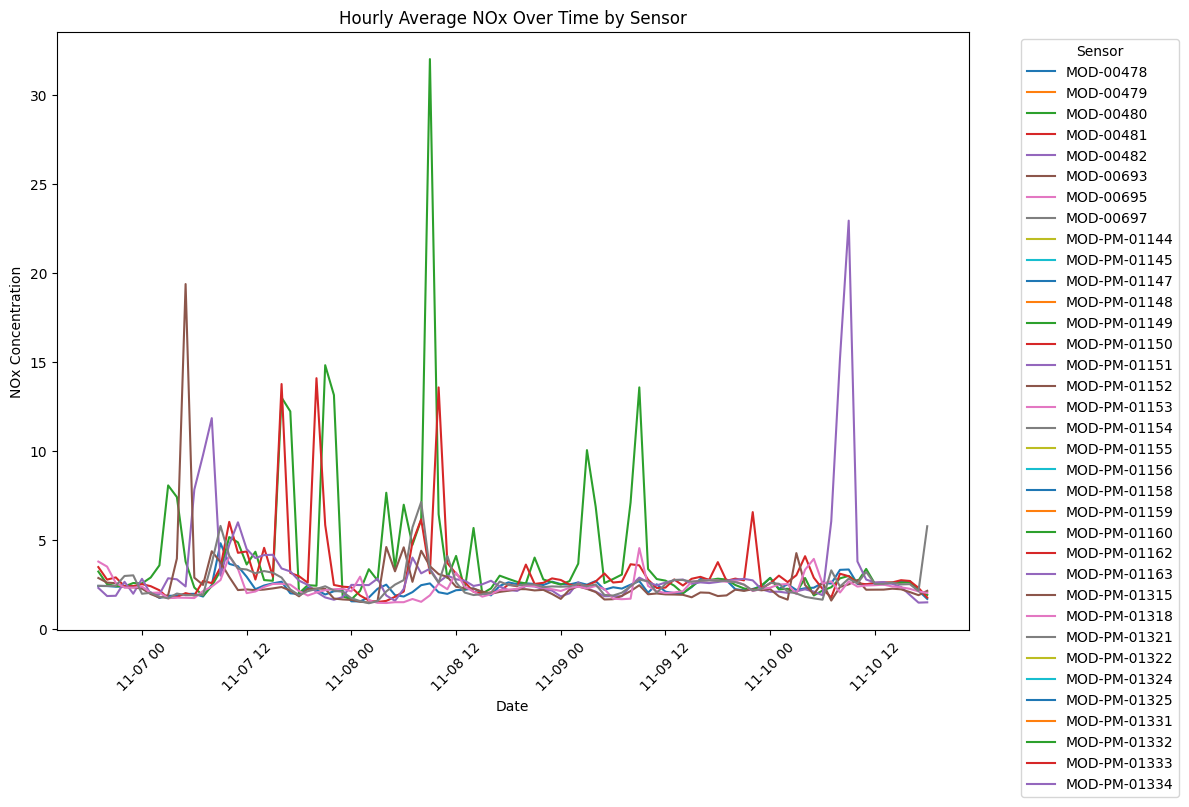

In [14]:
# Resample data to hourly averages for NOx grouped by sensor
hourly_avg_by_sensor = df.groupby('sn')['no'].resample('H').mean()

# Plot time series for NOx hourly averages for each sensor
fig, ax = plt.subplots(figsize=(12, 8))

# Plot each sensor's data
for sensor, data in hourly_avg_by_sensor.groupby(level=0):
    ax.plot(data.index.get_level_values(1), data.values, label=sensor)

ax.set_ylabel('NOx Concentration')
ax.set_title('Hourly Average NOx Over Time by Sensor')
ax.legend(title='Sensor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Challenges in Visualizing Data from 35 Sensors

While plotting data from all 35 sensors provides a comprehensive view of the spatial and temporal variations, it can be challenging to interpret due to the sheer volume of overlapping information. To simplify the analysis and uncover broader trends, we will aggregate the data by averaging the measurements across all sensors in 10-minute increments. This approach will help us focus on overall patterns and reduce the complexity of individual sensor variations.

C:\Users\kyttm\AppData\Local\Temp\ipykernel_16512\3112172298.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ten_min_avg = df['pm25'].resample('10T').mean()


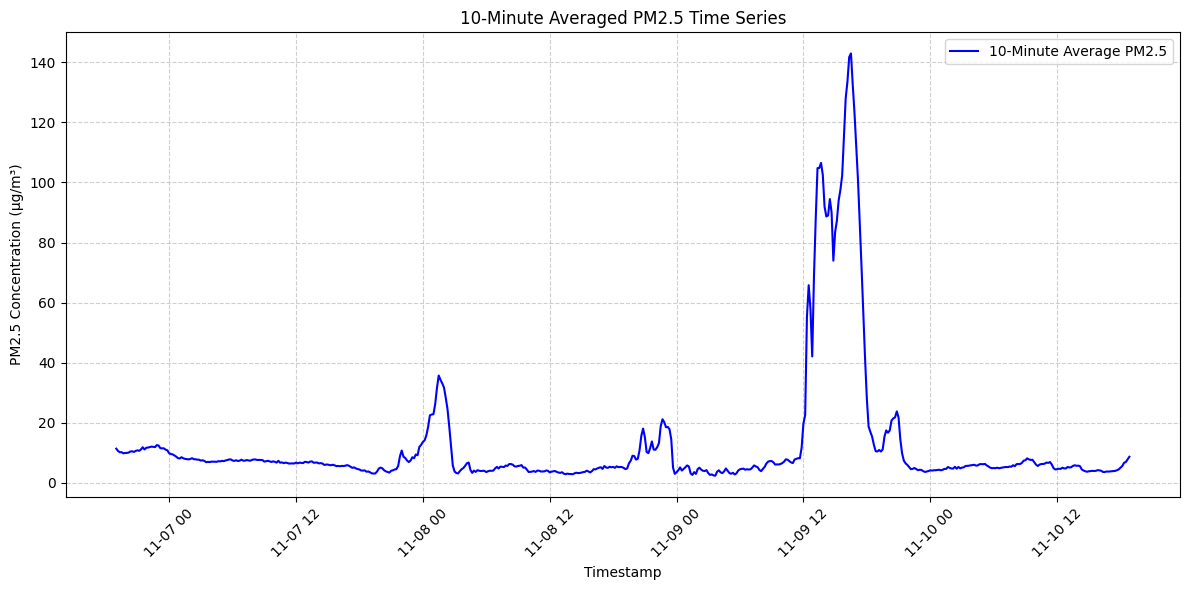

In [29]:
# Resample data to 10-minute averages for PM2.5
ten_min_avg = df['pm25'].resample('10T').mean()

# Plot the 10-minute averaged PM2.5 time series
plt.figure(figsize=(12, 6))
plt.plot(ten_min_avg.index, ten_min_avg.values, label='10-Minute Average PM2.5', color='blue')
plt.title('10-Minute Averaged PM2.5 Time Series')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

```markdown
### Interpretation of PM2.5 Results

#### Key Observations:
1. **Elevated PM2.5 Levels:**
  - PM2.5 concentrations show significant spikes during the wildfire event, particularly on November 9th, 2024.
  - The hourly average PM2.5 peaked at **133.68 µg/m³** around 4 PM, which is substantially higher than typical urban air quality levels.

2. **Temporal Trends:**
  - PM2.5 levels exhibit a clear diurnal pattern, with elevated concentrations during the daytime.
  - The highest concentrations align with the wildfire event, suggesting a strong regional contribution to particulate pollution.

3. **Outliers and Variability:**
  - The dataset reveals extreme values, indicating pollution spikes likely caused by wildfire smoke.
  - The variability in PM2.5 levels highlights the dynamic nature of air quality during such events.

4. **Comparison with Background Levels:**
  - Background PM2.5 levels (before and after the wildfire event) are significantly lower, averaging around **4-6 µg/m³**.
  - This stark contrast underscores the impact of the wildfire on air quality.

#### Implications:
- **Health Risks:**
  - Elevated PM2.5 levels pose serious health risks, particularly for vulnerable populations such as children, the elderly, and individuals with pre-existing respiratory conditions.
  - The observed concentrations far exceed the WHO's recommended daily average of **15 µg/m³**, highlighting the severity of the event.

- **Regional Influence:**
  - The persistent high PM2.5 levels, even outside typical traffic hours, confirm the significant impact of wildfire smoke on regional air quality.

- **Need for Further Analysis:**
  - The extreme values and temporal trends warrant further investigation to identify specific pollution sources and assess the spatial distribution of PM2.5.

#### Next Steps:
- Perform **spatial analysis** to examine the geographic distribution of PM2.5 levels during the wildfire event.
- Conduct **correlation analysis** to explore relationships between PM2.5 and other pollutants or meteorological variables.
- Investigate potential mitigation strategies to reduce exposure during similar events in the future.
```